In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import (balanced_accuracy_score, ConfusionMatrixDisplay, 
                            recall_score, precision_score, f1_score)

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTEN

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# reading the youth model dataset 
youth_model = pd.read_csv("datasets/youth_model.csv")

youth_model.head()

,hmlsmorethan1Yr,dv_neglect,dv_physical,dv_physical_rel,dv_sexual_rel,subsabuse,drugabuse,SPA
0,1,1,1,1,0,0,0,4
1,1,0,0,0,1,0,0,4
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,4


# Normal KNN Model

In [3]:
# creating our X and y

features = ['dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_sexual_rel', 'subsabuse', 'drugabuse', 'SPA']

X = youth_model[features]
y = youth_model['hmlsmorethan1Yr']

In [5]:
# Train Test Split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

In [6]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [7]:
# Instantiate KNN.
knn = KNeighborsClassifier()

#knn.fit(X_train, y_train)

In [8]:
cross_val_score(knn, X_train, y_train, cv = 5).mean()

0.6006734996121205

In [9]:
#let's manually tune this model
scores = []

for k in range(1, 51):
    for p in range(1, 4):
        for dist in ['uniform', 'distance']:
            knn = KNeighborsClassifier(n_neighbors=k, p = p, weights=dist)
            scores.append([k, p, dist, cross_val_score(knn, X_train, y_train, cv = 5).mean()])

In [10]:
scores

[[1, 1, 'uniform', 0.5919532664143492],
 [1, 1, 'distance', 0.5919532664143492],
 [1, 2, 'uniform', 0.5919520910223559],
 [1, 2, 'distance', 0.5919520910223559],
 [1, 3, 'uniform', 0.5904957803427442],
 [1, 3, 'distance', 0.5904957803427442],
 [2, 1, 'uniform', 0.6336726298220456],
 [2, 1, 'distance', 0.6331918944968147],
 [2, 2, 'uniform', 0.6327005806436447],
 [2, 2, 'distance', 0.6331907191048215],
 [2, 3, 'uniform', 0.6322151437504407],
 [2, 3, 'distance', 0.6327052822116176],
 [3, 1, 'uniform', 0.6031018594701332],
 [3, 1, 'distance', 0.6098968005829943],
 [3, 2, 'uniform', 0.6021309856837255],
 [3, 2, 'distance', 0.6089259267965866],
 [3, 3, 'uniform', 0.6016443733985284],
 [3, 3, 'distance', 0.6094101882977974],
 [4, 1, 'uniform', 0.6370706880744728],
 [4, 1, 'distance', 0.6351359928536168],
 [4, 2, 'uniform', 0.6360998142880651],
 [4, 2, 'distance', 0.6346493805684197],
 [4, 3, 'uniform', 0.6356155527868544],
 [4, 3, 'distance', 0.6351348174616235],
 [5, 1, 'uniform', 0.6011577

In [11]:
#p is Eucledian distance
#k is the 
pd.DataFrame(scores, columns=['k', 'p', 'weights', 'CV score']).sort_values('CV score',
                                                                           ascending=False)

,k,p,weights,CV score
276,47,1,uniform,0.656482
294,50,1,uniform,0.655508
246,42,1,uniform,0.655025
240,41,1,uniform,0.654541
264,45,1,uniform,0.653568
...,...,...,...,...
0,1,1,uniform,0.591953
3,1,2,distance,0.591952
2,1,2,uniform,0.591952
5,1,3,distance,0.590496


In [12]:
knn_final = KNeighborsClassifier(n_neighbors= 47, p = 1, weights='uniform')

In [13]:
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=47, p=1)

In [14]:
# train score
knn_final.score(X_train, y_train)

0.6627850557981563

In [15]:
# test score
knn_final.score(X_test, y_test)

0.6569767441860465

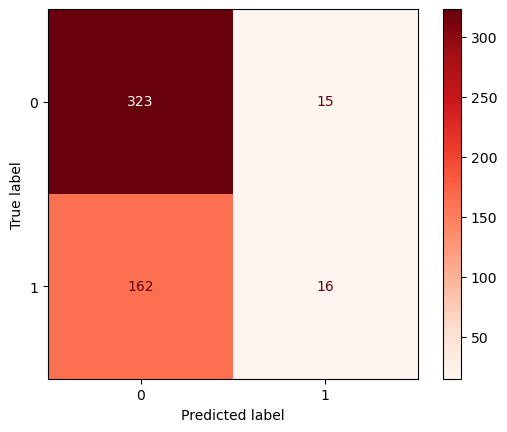

In [16]:
# Normal Ada Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_final, X_test, y_test, cmap = 'Reds');

In [17]:
preds1 = knn_final.predict(X_test)
preds1[20:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
def evaluation(X_test, y_test, preds, model):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    
    b_acc = balanced_accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds, pos_label = 1)
    prec = precision_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)

    print(f'balanced_accuracy: {b_acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

    return {
        'balanced_accuracy': b_acc,
        'recall': recall,
        'precision': prec,
        'f1_score': f1
    }

In [19]:
scores = []

balanced_accuracy: 0.5227544711122931
recall: 0.0898876404494382
precision: 0.5161290322580645
f1 score: 0.15311004784688995


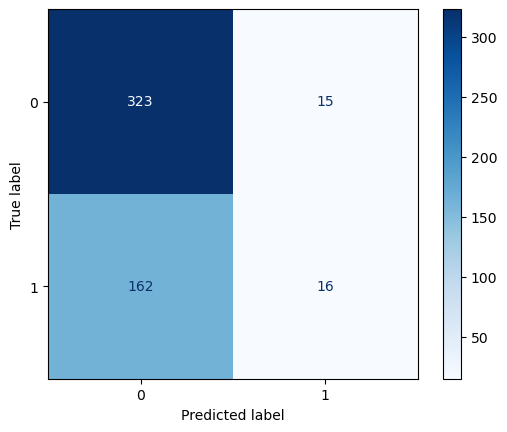

In [20]:
scores.append(evaluation(X_test, y_test, preds1, knn_final))

# Oversample the minority class

In [21]:
pipe = make_pipeline(RandomOverSampler(random_state=42),
                     KNeighborsClassifier(n_neighbors= 47, p = 1, weights='uniform'))

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=47, p=1))])

balanced_accuracy: 0.5621800412206636
recall: 0.33146067415730335
precision: 0.4573643410852713
f1 score: 0.38436482084690554


{'balanced_accuracy': 0.5621800412206636,
 'recall': 0.33146067415730335,
 'precision': 0.4573643410852713,
 'f1_score': 0.38436482084690554}

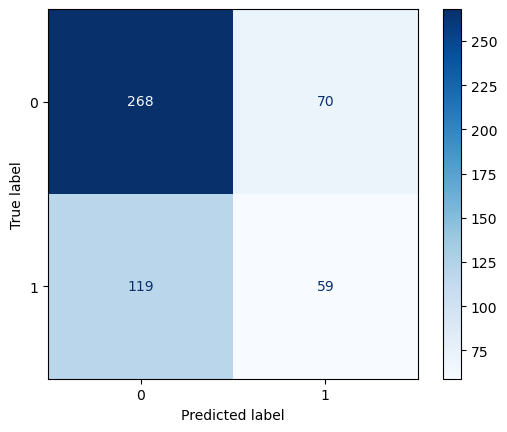

In [23]:
evaluation(X_test, y_test, pipe.predict(X_test), pipe)

In [24]:
gs = GridSearchCV(pipe,
                 param_grid=
                  {'randomoversampler__sampling_strategy' : [.25, .5, .75, 1.0]},
                 n_jobs=-1)

In [25]:
gs.fit(X_train, y_train)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\danie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\danie\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\danie\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y,

GridSearchCV(estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=47,
                                                             p=1))]),
             n_jobs=-1,
             param_grid={'randomoversampler__sampling_strategy': [0.25, 0.5,
                                                                  0.75, 1.0]})

In [26]:
# train score
gs.score(X_train, y_train)

0.6462882096069869

In [27]:
# test score
gs.score(X_test, y_test)

0.6511627906976745

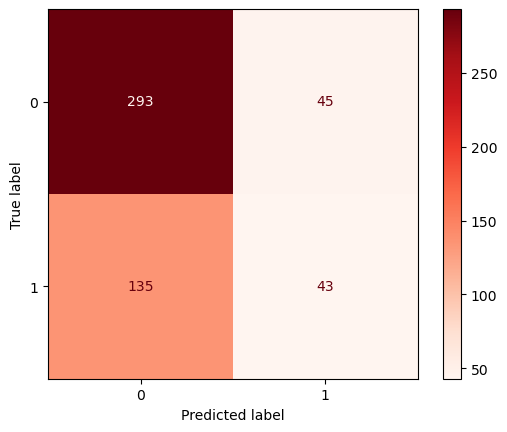

In [28]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap = 'Reds');

## Smarter Move: Grid search with balanced accuracy as your scoring metric

You can change the scoring metric for GridSearchCV. It will then pick the model that hasn't the best mean score on that metric.


In [29]:
gs2 = GridSearchCV(pipe,
                 param_grid=
                  {'randomoversampler__sampling_strategy' : [.25, .5, .75, 1.0]},
                 n_jobs=-1, scoring='balanced_accuracy')

In [30]:
gs2.fit(X_train, y_train)

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\danie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\danie\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\danie\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = self._fit(X, y,

GridSearchCV(estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=47,
                                                             p=1))]),
             n_jobs=-1,
             param_grid={'randomoversampler__sampling_strategy': [0.25, 0.5,
                                                                  0.75, 1.0]},
             scoring='balanced_accuracy')

In [31]:
# train score
gs2.score(X_train, y_train)

0.5612905411745082

In [32]:
# test score
gs2.score(X_test, y_test)

0.5621800412206636

balanced_accuracy: 0.5621800412206636
recall: 0.33146067415730335
precision: 0.4573643410852713
f1 score: 0.38436482084690554


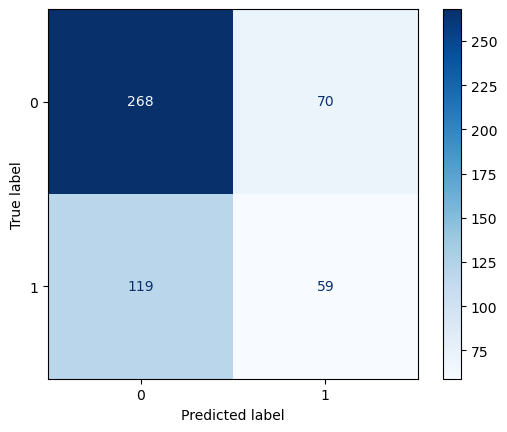

In [33]:
# making prediction
preds2 = gs2.predict(X_test)

# evaluating the model

scores.append(evaluation(X_test, y_test, preds2, gs2))

In [34]:
pd.DataFrame(scores, index=['knn', 'RandomOverSampler'])

,balanced_accuracy,recall,precision,f1_score
knn,0.522754,0.089888,0.516129,0.153110
RandomOverSampler,0.562180,0.331461,0.457364,0.384365


## Option 2: Create synthetic data points similar to the minority class

In [35]:
pipe3 = make_pipeline(SMOTEN(random_state=42), KNeighborsClassifier(n_neighbors= 47, p = 1, weights='uniform'))

pipe3

Pipeline(steps=[('smoten', SMOTEN(random_state=42)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=47, p=1))])

In [36]:
gs3 = GridSearchCV(
    pipe3, 
    {'smoten__k_neighbors' : [3, 5, 7],
    }, 
    scoring='balanced_accuracy'
)

In [37]:
gs3 = GridSearchCV(
    pipe3, 
    {'smoten__k_neighbors' : [3, 5, 7],
    }, 
    scoring='balanced_accuracy'
)

In [38]:
gs3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smoten', SMOTEN(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=47,
                                                             p=1))]),
             param_grid={'smoten__k_neighbors': [3, 5, 7]},
             scoring='balanced_accuracy')

In [39]:
# train score
gs3.score(X_train, y_train)

0.5635215437703944

In [40]:
# test score
gs3.score(X_test, y_test)

0.5447277441659464

balanced_accuracy: 0.5447277441659464
recall: 0.3202247191011236
precision: 0.4222222222222222
f1 score: 0.3642172523961661


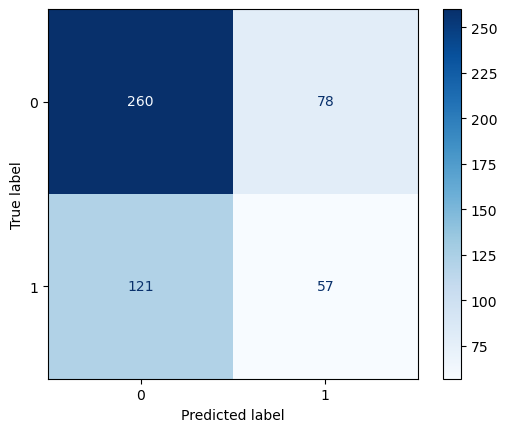

In [41]:
# create prediction
preds3 = gs3.predict(X_test)

# find out respective scores
scores.append(evaluation(X_test, y_test, preds3, gs3))

In [42]:
pd.DataFrame(scores, index=['knn', 'RamdomOverSampler', 'SMOTEN'])

,balanced_accuracy,recall,precision,f1_score
knn,0.522754,0.089888,0.516129,0.153110
RamdomOverSampler,0.562180,0.331461,0.457364,0.384365
SMOTEN,0.544728,0.320225,0.422222,0.364217


# ADASYN with KNN

In [43]:
pipe4 = make_pipeline(ADASYN(random_state=42),
                    KNeighborsClassifier(n_neighbors= 47, p = 1, weights='uniform'))

In [44]:
gs4 = GridSearchCV(
    pipe4, 
    {'adasyn__n_neighbors':[3,5,7],}, 
    scoring='balanced_accuracy',
    n_jobs=-1
)

In [45]:
gs4.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('adasyn', ADASYN(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=47,
                                                             p=1))]),
             n_jobs=-1, param_grid={'adasyn__n_neighbors': [3, 5, 7]},
             scoring='balanced_accuracy')

In [46]:
# train score
gs4.score(X_train, y_train)

0.5612801159287331

In [47]:
# test score
gs4.score(X_test, y_test)

0.5493152051060435

balanced_accuracy: 0.5493152051060435
recall: 0.3146067415730337
precision: 0.43410852713178294
f1 score: 0.36482084690553745


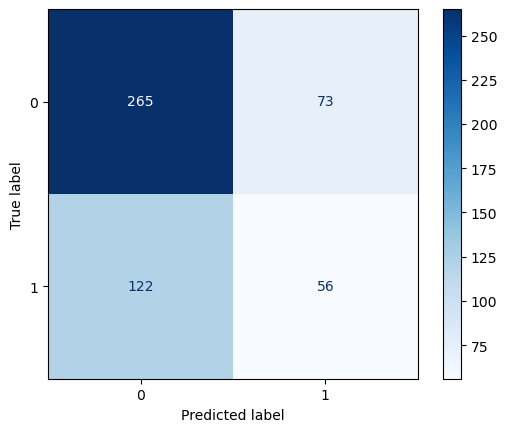

In [48]:
preds4 = gs4.predict(X_test)

scores.append(evaluation(X_test, y_test, preds4, gs4))

In [49]:
pd.DataFrame(scores, index = ['knn', 'RandomOverSampler',
                             'SMOTEN', 'ADASYN'])

,balanced_accuracy,recall,precision,f1_score
knn,0.522754,0.089888,0.516129,0.153110
RandomOverSampler,0.562180,0.331461,0.457364,0.384365
SMOTEN,0.544728,0.320225,0.422222,0.364217
ADASYN,0.549315,0.314607,0.434109,0.364821


## Overweighing minority class importance in algorithms
_____

since we don't have class_weight with KNN model, we will use weight as the main parameter to overweigh: 'distance': weight points by the inverse of their distance

In [50]:
knn5 = KNeighborsClassifier(n_neighbors= 47, p = 1, weights='distance')

knn5.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=47, p=1, weights='distance')

In [51]:
# train score
knn5.score(X_train, y_train)

0.710334788937409

In [52]:
# test score
knn5.score(X_test, y_test)

0.6608527131782945

balanced_accuracy: 0.5390100392261152
recall: 0.14606741573033707
precision: 0.5306122448979592
f1 score: 0.22907488986784139


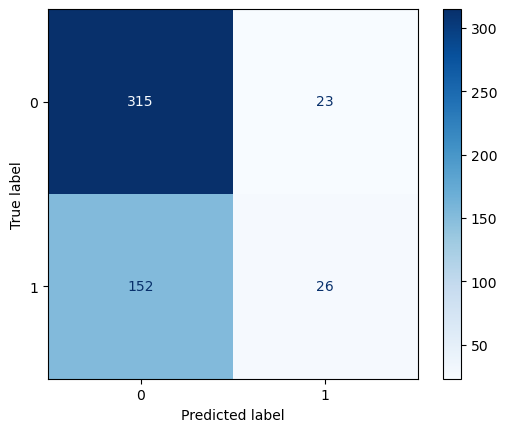

In [54]:
scores.append(evaluation(X_test, y_test, knn5.predict(X_test), knn5))

In [55]:
pd.DataFrame(scores, index=['knn', 'RandomOverSampler', 'SMOTEN', 'ADASYN', 'Weightedknn'])

,balanced_accuracy,recall,precision,f1_score
knn,0.522754,0.089888,0.516129,0.153110
RandomOverSampler,0.562180,0.331461,0.457364,0.384365
SMOTEN,0.544728,0.320225,0.422222,0.364217
ADASYN,0.549315,0.314607,0.434109,0.364821
Weightedknn,0.539010,0.146067,0.530612,0.229075
